##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [1]:
import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [3]:
# simple sequential model with a fully connected layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
# a more complex model 
# copied from https://github.com/dragen1860/TensorFlow-2.x-Tutorials/tree/master/01-TF2.0-Overview

model = tf.keras.Sequential([
    tf.keras.layers.Reshape(
        target_shape=[28, 28, 1],
        input_shape=(28, 28,)),
#    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Conv2D(2, 5, padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same'),
    tf.keras.layers.Conv2D(4, 5, padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(10)])

In [ ]:
# same, but built with functional layers

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Reshape(
        target_shape=[28, 28, 1],
        input_shape=(28, 28,)))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
#     model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
#                                     input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(10))

In [5]:
# two paths

inp = tf.keras.Input(shape=(28,28))

out1 = tf.keras.layers.Dense(128, activation='relu')(inp)
out1 = tf.keras.layers.Dropout(0.2)(out1)
out1 = tf.keras.layers.Flatten() (out1)

out2 = tf.keras.layers.Reshape(target_shape=[28, 28, 1], input_shape=(28, 28,)) (inp)
out2 = tf.keras.layers.Conv2D(2, 5, padding='same', activation=tf.nn.relu) (out2)
out2 = tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same') (out2)
out2 = tf.keras.layers.Conv2D(4, 5, padding='same', activation=tf.nn.relu) (out2)
out2 = tf.keras.layers.MaxPooling2D((2, 2), (2, 2), padding='same') (out2)
out2 = tf.keras.layers.Flatten() (out2)

outs = tf.keras.layers.concatenate([out1, out2])
outs = tf.keras.layers.Dense(32, activation=tf.nn.relu)(outs)
outs = tf.keras.layers.Dropout(rate=0.4)(outs)

outs = tf.keras.layers.Dense(10)(outs)


model = tf.keras.Model(inputs=inp,outputs=outs)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 128)        

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
# Need Matplotlib
from matplotlib import pyplot as plt

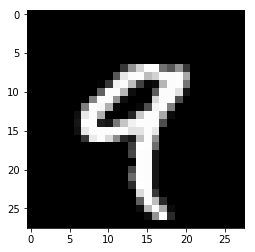

In [11]:
# pixels = first_image.reshape((28, 28))
# display an image
plt.imshow(x_train[4], cmap='gray')
plt.show()

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [12]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.01495919, -0.02276708,  0.03167769, -0.01518186,  0.05475245,
         0.00716107, -0.02568899,  0.00078394, -0.02786337,  0.01259397]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.10116559, 0.09742009, 0.10287115, 0.09816185, 0.10527248,
        0.10037977, 0.09713586, 0.09974167, 0.09692487, 0.1009266 ]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
y_train[4]

9

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [16]:
loss_fn(y_train[:1], predictions).numpy()

2.2987947

In [17]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
optimizer = 'adam'

In [22]:
model.compile(optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [23]:
# add validation data and batch size to your model.fit statement
model.fit(x_train, y_train, epochs=5, validation_data = (x_test, y_test), batch_size=128)

Epoch 1/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0471 - val_accuracy: 0.9847
Epoch 2/5
469/469 [==============================] - 40s 86ms/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 0.0459 - val_accuracy: 0.9851
Epoch 3/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 4/5
469/469 [==============================] - 40s 86ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0404 - val_accuracy: 0.9860
Epoch 5/5
469/469 [==============================] - 40s 86ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0381 - val_accuracy: 0.9870


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])